In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator

plt.rcParams['figure.figsize'] = (14, 6.5) # графики одного размера

In [18]:
df = pd.read_csv('boston.csv')

In [19]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

<Axes: xlabel='MEDV', ylabel='Count'>

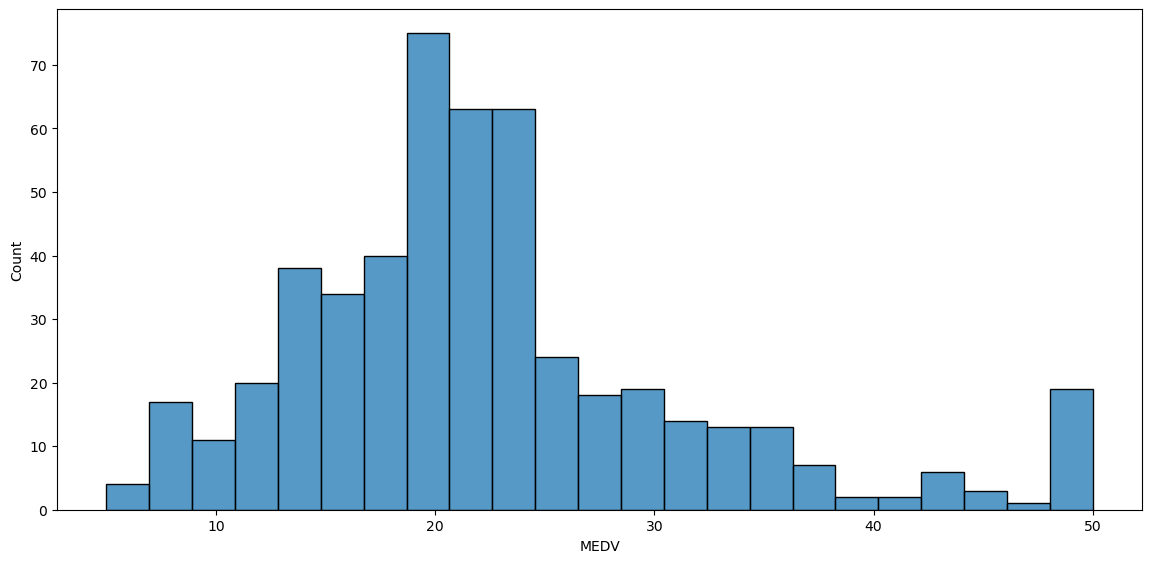

In [20]:
sns.histplot(y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

1. `h`:
   - **Функция:** `h(r, y)`
   - **Описание:** Эта функция вычисляет критерий информативности для подмножества данных. Она использует дисперсию значений целевой переменной в данном подмножестве.
   - **Параметры:**
     - `r`: набор данных.
     - `y`: целевая переменная.
   - **Возвращает:** Значение дисперсии для элементов целевой переменной в указанном подмножестве данных.

2. `split_node`:
   - **Функция:** `split_node(r_m, feature, t)`
   - **Описание:** Эта функция разделяет набор данных на две части на основе заданного порога и признака. Она используется для создания разделений в дереве решений.
   - **Параметры:**
     - `r_m`: исходный набор данных.
     - `feature`: признак, по которому проводится разделение.
     - `t`: пороговое значение для признака.
   - **Возвращает:** Два подмножества данных, разделенных по указанному порогу.

3. `q_error`:
   - **Функция:** `q_error(r_m, feature, t, y)`
   - **Описание:** Функция для расчета ошибки разделения (Q ошибки). Она вычисляет взвешенное значение информативности для двух подмножеств, полученных в результате разделения.
   - **Параметры:**
     - `r_m`: исходный набор данных.
     - `feature`: признак для разделения.
     - `t`: пороговое значение для признака.
     - `y`: целевая переменная.
   - **Возвращает:** Значение Q ошибки для заданного разделения.

4. `search_t`:
   - **Функция:** `search_t(r_m, feature, y)`
   - **Описание:** Функция для поиска оптимального порога разделения для заданного признака. Она перебирает все уникальные значения признака и вычисляет Q ошибку для каждого из них.
   - **Параметры:**
     - `r_m`: исходный набор данных.
     - `feature`: признак для разделения.
     - `y`: целевая переменная.
   - **Возвращает:** Список пар (порог, Q ошибка), отсортированный по возрастанию Q ошибки.

5. `search_feature`:
   - **Функция:** `search_feature(r_m, y)`
   - **Описание:** Функция для поиска наилучшего признака и порога для разделения. Она применяет `search_t` ко всем признакам и выбирает лучший на основе Q ошибки.
   - **Параметры:**
     - `r_m`: исходный набор данных.
     - `y`: целевая переменная.
   - **Возвращает:** Список троек (признак, порог, Q ошибка), отсортированный по возрастанию Q ошибки.

In [22]:
def h(r, y):
    """Критерий информативности"""
    return y[r.index].var()

def split_node(r_m, feature, t):
    """
    :param r_m: dataframe
    :param feature: признак
    :param t: порог
    :return: разделение
    """
    r_l = r_m[r_m[feature] < t]
    r_r = r_m[r_m[feature] >= t]
    return r_l, r_r

def q_error(r_m, feature, t, y):
    r_l, r_r = split_node(r_m, feature, t)
    q = len(r_l) / len(r_m) * h(r=r_l, y=y) + len(r_r) / len(r_m) * h(r=r_r, y=y)
    return q

def search_t(r_m, feature, y):
    q_t = {}
    for t in r_m[feature].unique():
        q_err = q_error(r_m=r_m, feature=feature, t=t, y=y)
        if q_err != q_err:
            continue
        else:
            q_t[t] = q_err
    q_t = sorted(q_t.items(), key=lambda x: x[1])
    return q_t

def search_feature(r_m, y):
    results = []
    for f in r_m.columns:
        t, q = search_t(r_m=r_m, feature=f, y=y)[0]
        results.append((f, t, q))
        results = sorted(results, key=lambda x: x[2])
    return results

<Axes: xlabel='0', ylabel='1'>

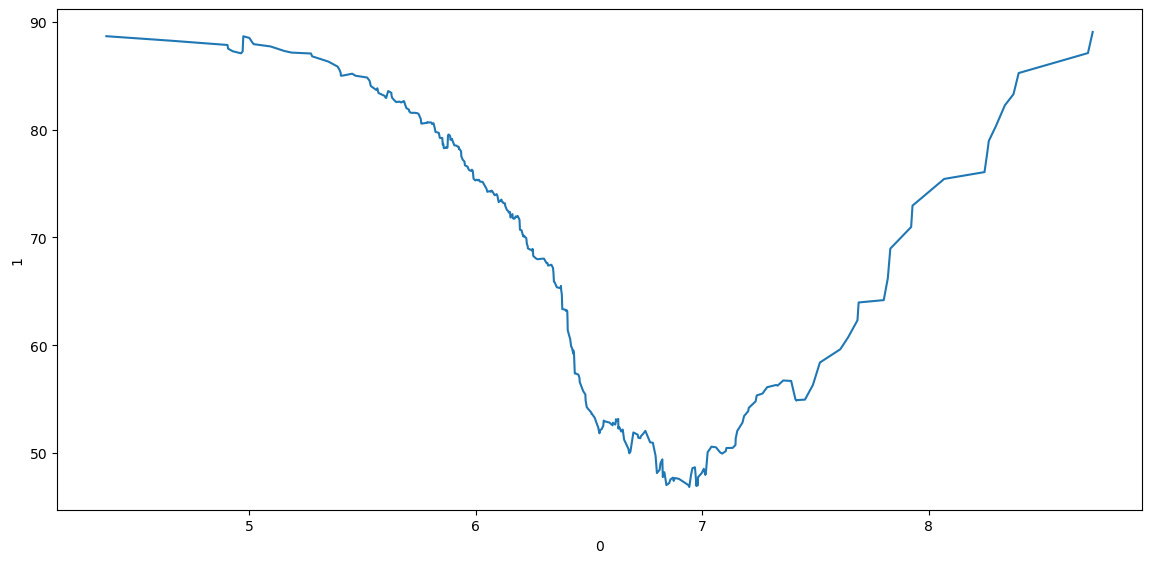

In [23]:
sns.lineplot(data=pd.DataFrame(search_t(X_train, 'RM', y_train)), x=0, y=1)

In [24]:
search_feature(X_train, y_train)

[('RM', 6.943, 46.85494644189347),
 ('LSTAT', 7.88, 47.559364157707684),
 ('INDUS', 6.91, 65.95941813785998),
 ('PTRATIO', 19.7, 67.185738133042),
 ('NOX', 0.671, 68.68106632938117),
 ('TAX', 411.0, 70.89315604430274),
 ('CRIM', 6.71772, 71.29277954895183),
 ('RAD', 24, 75.09153563750937),
 ('ZN', 17.5, 76.57817210432852),
 ('B', 338.63, 78.50767238427211),
 ('DIS', 1.8773, 79.24701032002316),
 ('AGE', 76.5, 79.50678668758094),
 ('CHAS', 1, 86.0534950107841)]